In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

viz_dict = np.load("viz_dict.npy").item()
word2idx = np.load("word2idx.npy").item()
idx2word = np.load("idx2word.npy").item()
idx2title = np.load("movid_to_name_dict.npy").item()

sortedKeys = sorted(viz_dict)
print(len(sortedKeys))
# print(sortedKeys)    


4240


In [2]:
marginal = {}
conditional = {}
embed = defaultdict(lambda: defaultdict())
mn, mx = float("-inf"), float("inf")
embed_min_max = defaultdict(lambda:(mx,mn,mx,mn)) # (xmin, xmax, ymin, ymax)
adjList = defaultdict(set)
ids = set()
epochs = -1
for k in sortedKeys:
    epoch, id1, id2 = k
    conditional[(epoch, id1, id2)] = viz_dict[k][0]
    adjList[id1].add(id2)
    ids.add(id1)
    ids.add(id2)
    epochs = max(epochs, epoch)



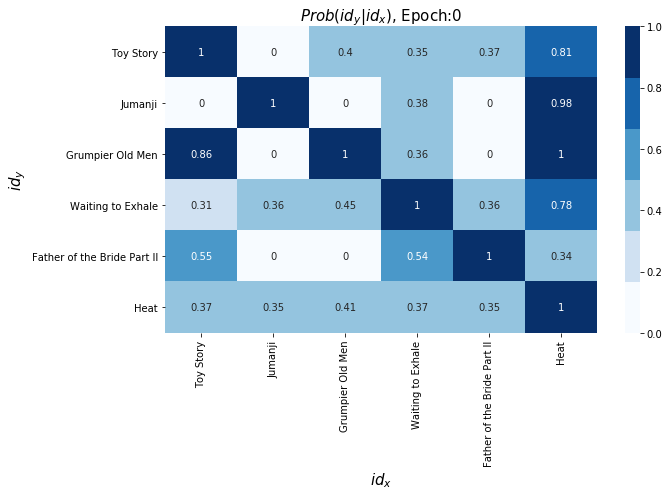

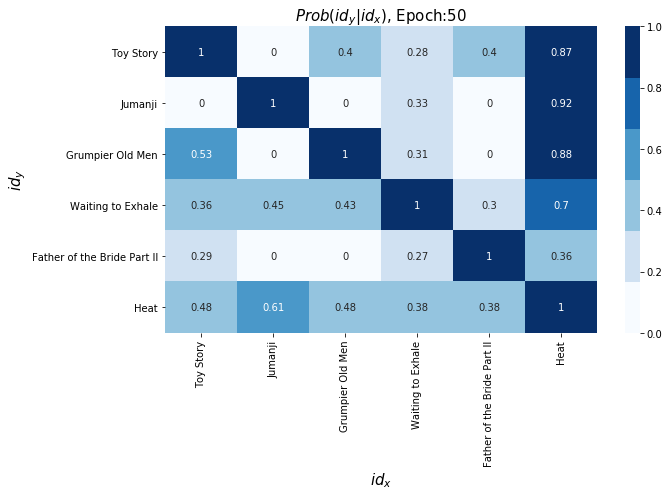

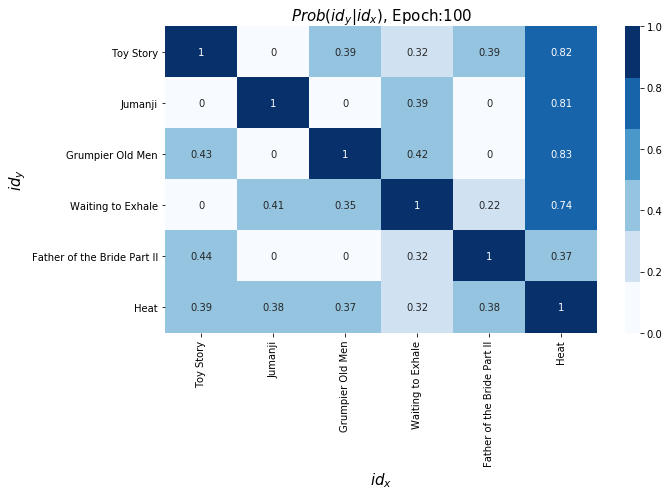

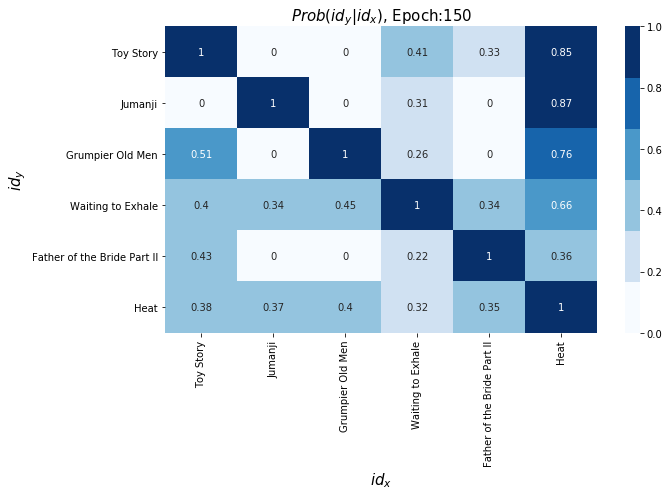

In [3]:
n = len(ids)
ids = list(ids)
my_cmap = plt.cm.get_cmap("Blues", n)
    
for e in range(0, epochs+1, 50):
    plt.figure(figsize = (10, 7))
    data = [[0]*n for i in range(n)]
    for i in range(n):
        index = ids[i]
        data[index][index] = 1
        for j in adjList[index]:
            if (e, index, j) in conditional:
                data[index][j] = conditional[(e, index, j)]
    idx = [idx2title[i+1] for i in ids]
    df_cm = pd.DataFrame(data, index = idx, columns = idx)
    sn.heatmap(df_cm, cmap=my_cmap, annot=True)
    plt.title("$Prob(id_y|id_x)$, Epoch:%d"%e, fontsize=15)
    plt.xlabel(r"$id_x$", fontsize=15)
    plt.ylabel(r"$id_y$", fontsize=15)
    plt.tight_layout()
    plt.show()


In [4]:
path = "path to movie train file"
grnd_cpd = {}
with open(path+"movie_train.txt", "r") as f:
    for line in f.readlines():
        line = line.split("\t")
        id1, id2, cprob = line[1], line[2], line[3]
        grnd_cpd[(word2idx[id1],word2idx[id2])] = float(cprob)


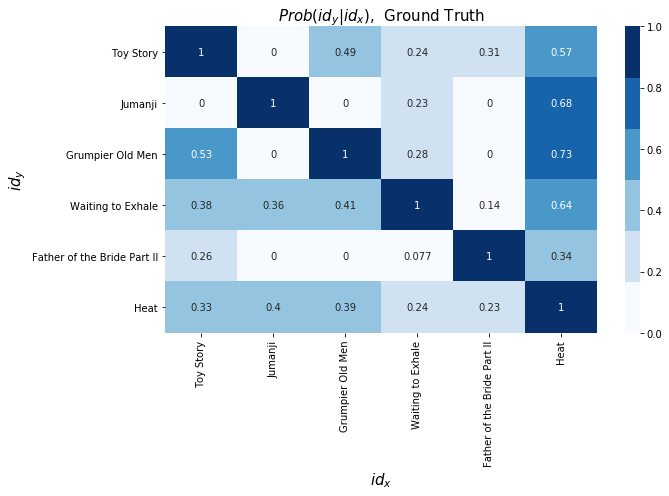

In [5]:
plt.figure(figsize = (10, 7))
data = [[0]*n for i in range(n)]

for i in range(n):
    index = ids[i]
    data[index][index] = 1 
    for j in adjList[index]:
        if (index, j) in grnd_cpd:
            data[index][j] = grnd_cpd[(index, j)]
idx = [idx2title[i+1] for i in ids]
df_cm = pd.DataFrame(data, index = idx, columns = idx)
sn.heatmap(df_cm, cmap=my_cmap, annot=True)
plt.title("$Prob(id_y|id_x)$,  Ground Truth", fontsize=15)
plt.xlabel(r"$id_x$", fontsize=15)
plt.ylabel(r"$id_y$", fontsize=15)
plt.tight_layout()
plt.show()



In [ ]:
# Box Plot
my_cmap = plt.cm.get_cmap("hsv", n)
for e in range(0, epochs+1, 50):
    plt.figure(figsize = (10, 7))
    for idx in embed[e]:
        bottom, top = embed[e][idx]
        x1,y1,x2,y2 = bottom[0], bottom[1], top[0], top[1]
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1,y2-y1, fill=True, facecolor=my_cmap(idx), alpha=0.5, label=idx2title[idx+1]))
        plt.title("Epoch: %d"%e)
    plt.legend(loc=0, bbox_to_anchor=(1, 1), fontsize=15)
    plt.tight_layout()
#     plt.savefig("%d.png"%e)
    plt.show()